In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [10]:
X= pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
y= pd.DataFrame(load_diabetes().target, columns=['MEDV'])

In [11]:
y.head()

,MEDV
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
tree= DecisionTreeRegressor()

In [14]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
y_pred= tree.predict(X_test)

In [22]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 4421.426966292135
R2: 0.16547747664455548


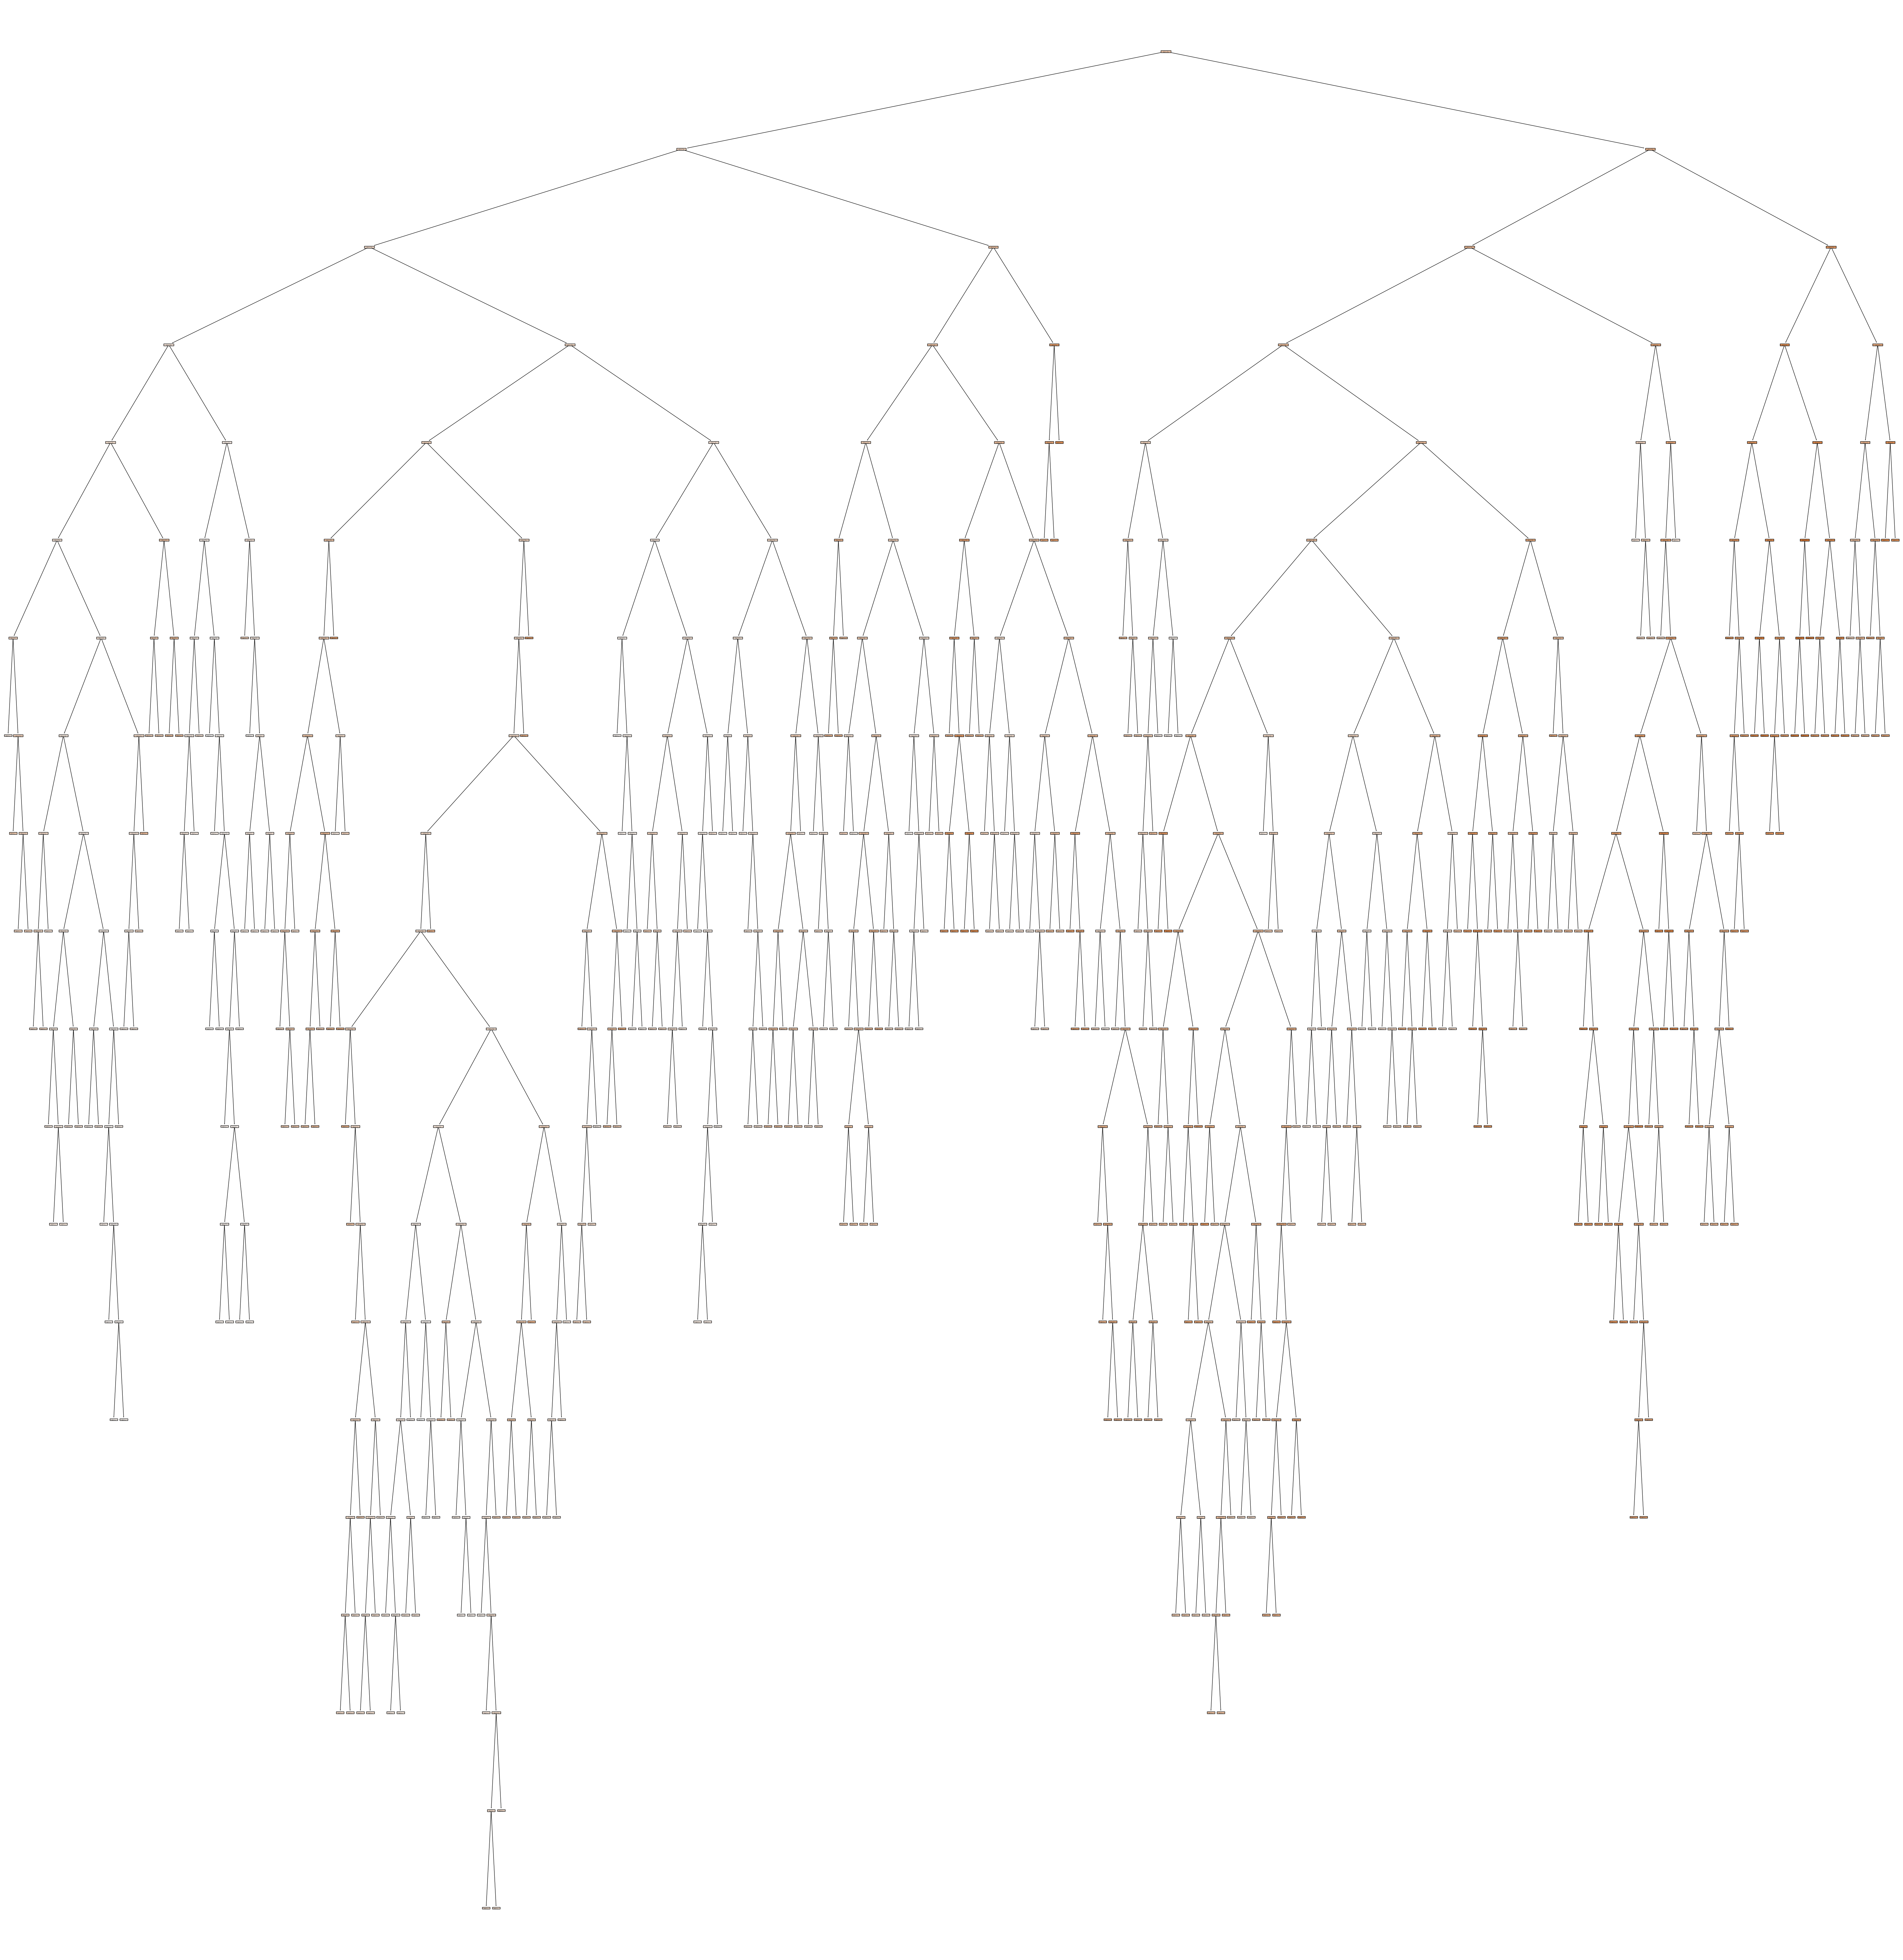

In [27]:
plt.figure(figsize=(82, 85))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

# **HyperParameter Tuning**

In [28]:
params={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best', 'random'],'max_depth':range(1,10),'max_features':['sqrt','log2']}

In [29]:
grid=GridSearchCV(tree, params, cv=5)

In [30]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(1, 10),
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [31]:
y_pred= grid.predict(X_test)

In [32]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 3840.758404947338
R2: 0.2750758024205914


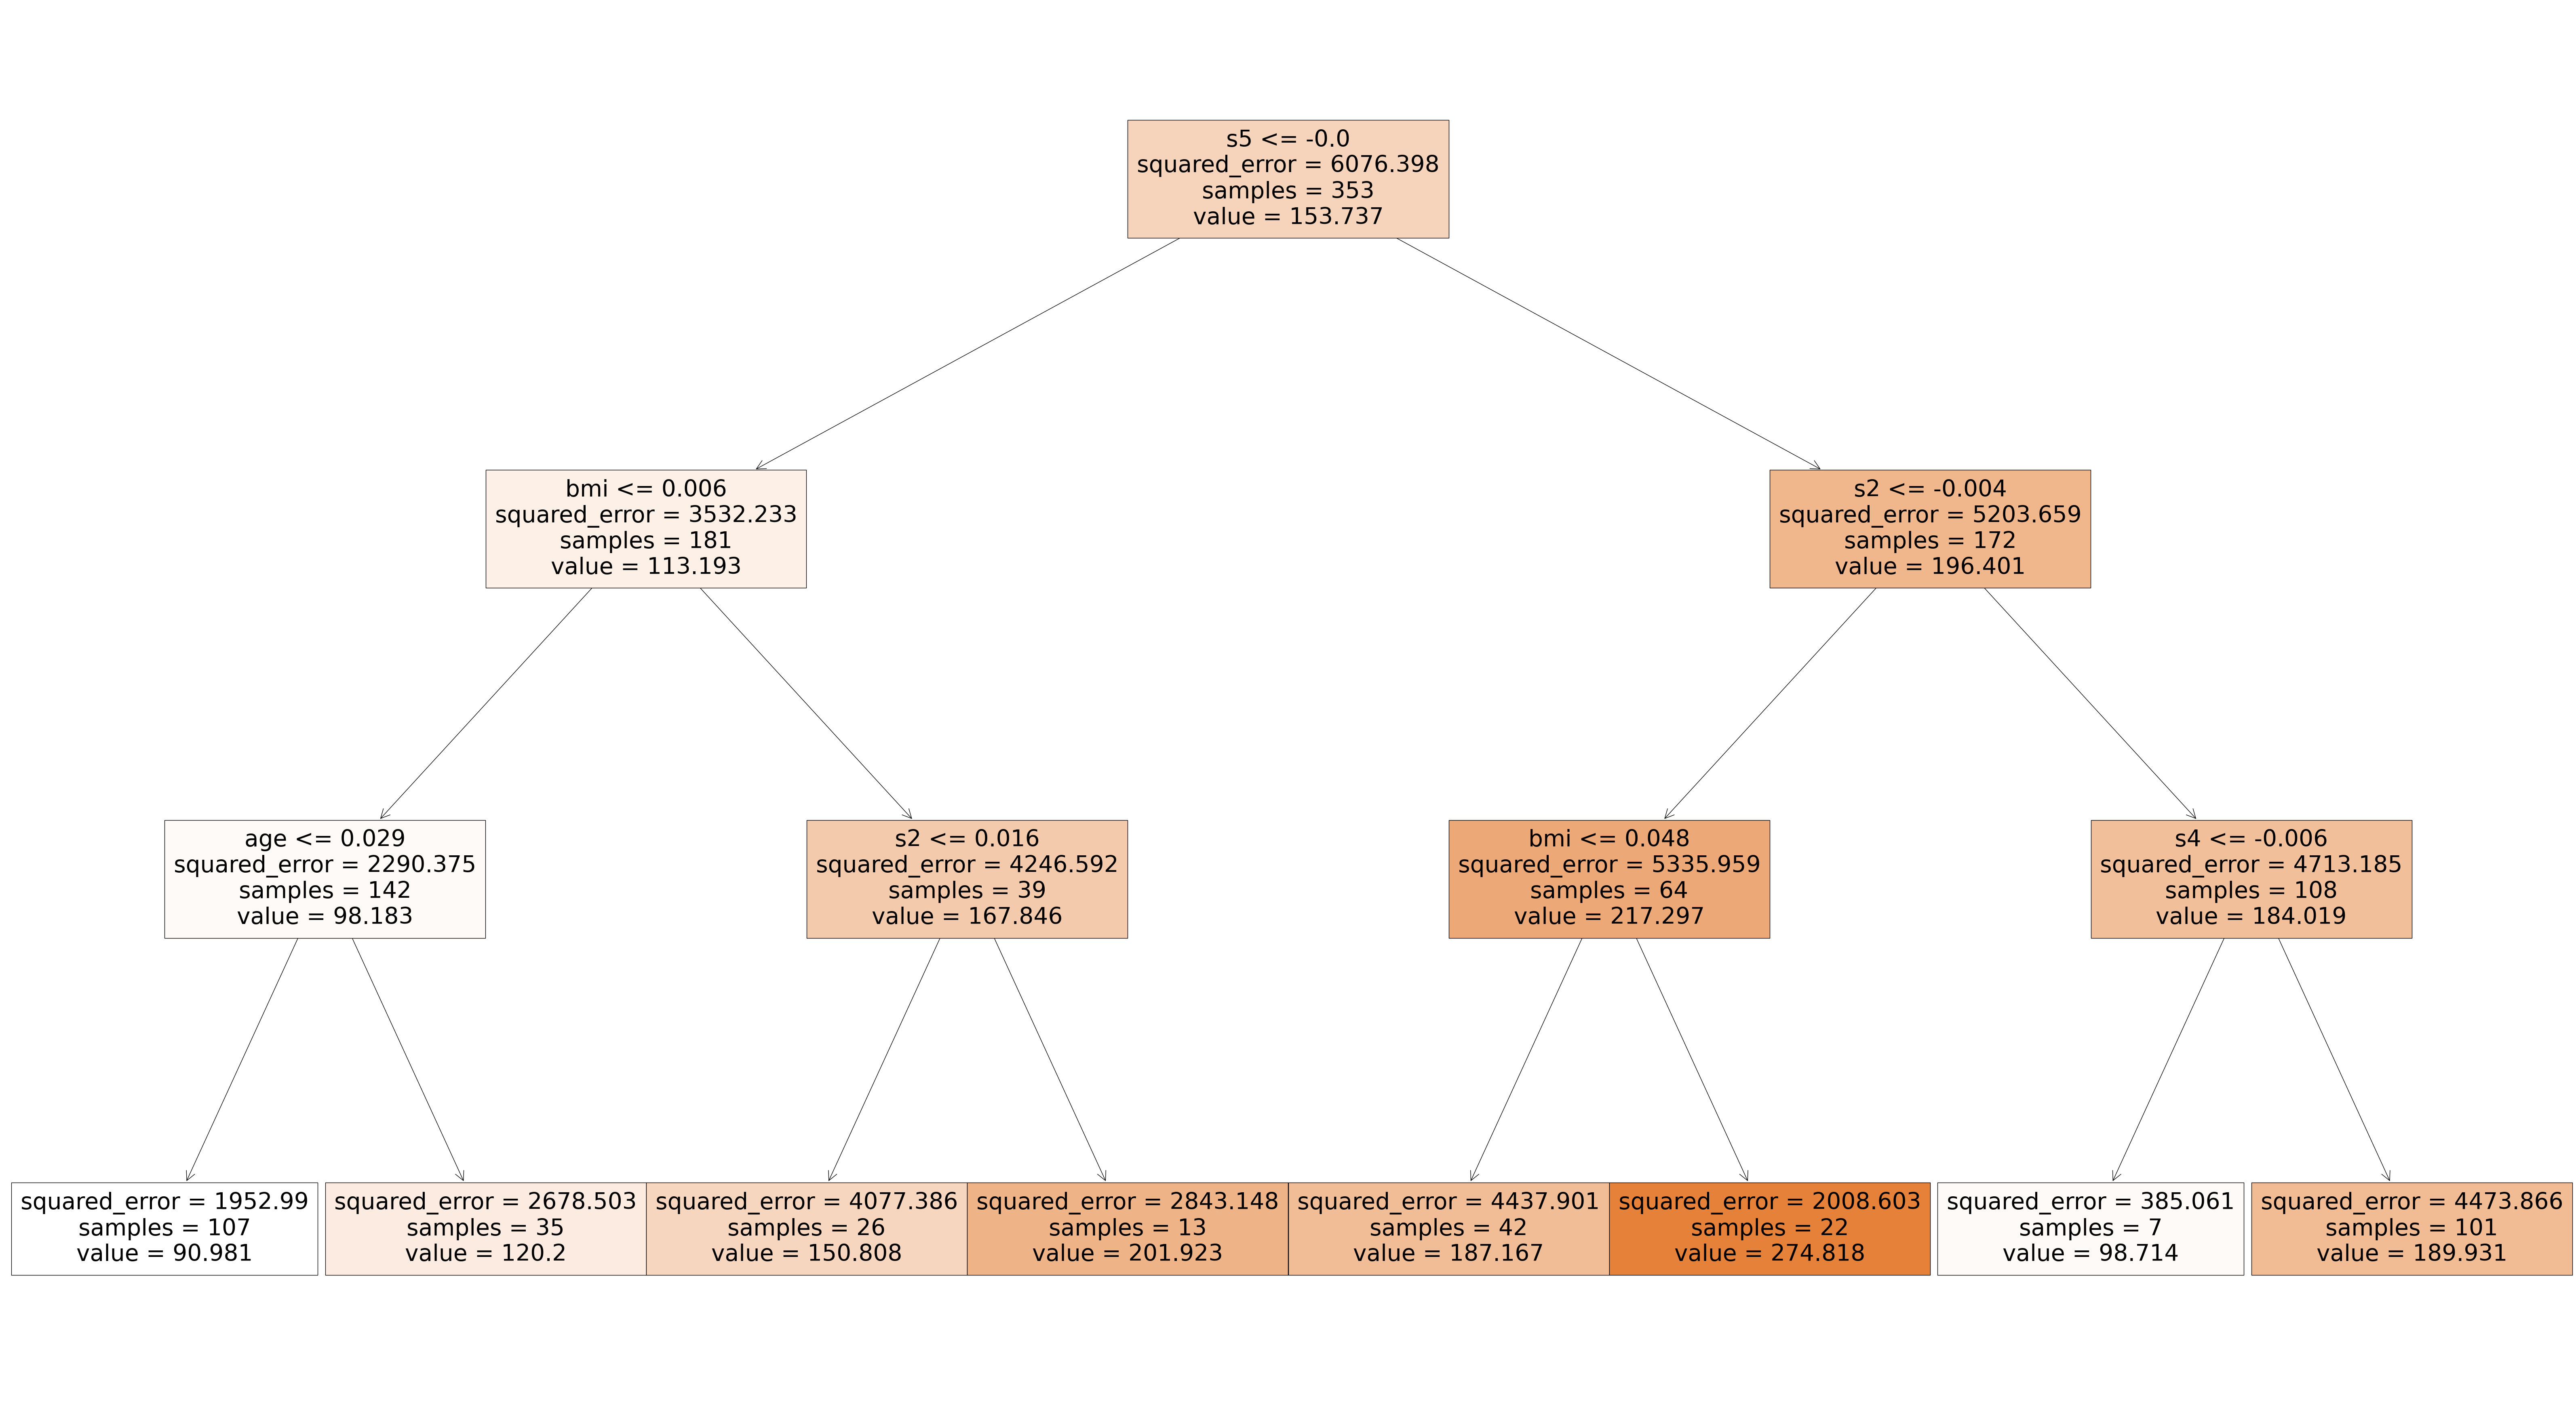

In [35]:
plt.figure(figsize=(82, 45))
plot_tree(grid.best_estimator_, feature_names=X.columns, filled=True)
plt.show()
